# Example molyso Embedding

This example should give a brief overview how *molyso* can easily be called and embedded.
As of now, only the steps until after the cell detection are to be performed.

For the example, a test image shipped with *molyso* will be used.

In [1]:
# Some general setup routines
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import numpy
from matplotlib import pylab
pylab.rcParams.update({
    'figure.figsize': (10, 6),
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.family': 'sans-serif',
    'image.cmap': 'gray',
})

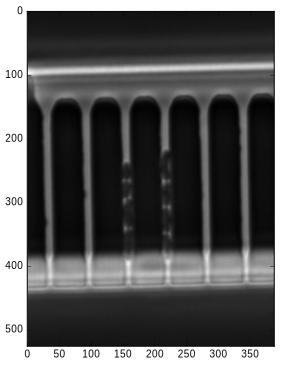

In [2]:
# the test image can be fetched by the `test_image` function
# it is included in molyso primarily to run testing routines

from molyso.test import test_image
pylab.imshow(test_image())

Detected angle: -1.5074°


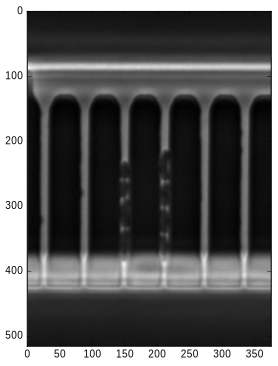

In [3]:
# the central starting point of the molyso highlevel interface
# is the Image class

from molyso.mm.image import Image
image = Image()
image.setup_image(test_image())

# as a first test, let's run the autorotate routine, which will
# automatically correct the rotation detected

image.autorotate()
print("Detected angle: %.4f°" % (image.angle,))
pylab.imshow(image.image)

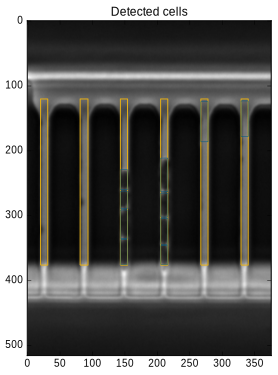

In [4]:
# the next two functions call the low-level steps
# therefore, while not much is to see here, ...
# the magic happens behind the curtains

image.find_channels()
image.find_cells_in_channels()

from molyso.debugging.debugplot import inject_poly_drawing_helper
inject_poly_drawing_helper(pylab)

# embedded debugging functionality can be used
# to produce an image with cells and channels drawn as overlay
image.debug_print_cells(pylab)

In [5]:
# let's look into an important part of the Image-class

# the channels member, which supports the iterator interface
# ... therefore, we call it as parameter to list()
# to get a list of channels

channels = list(image.channels)

# and print some info about it (the .cells member works analogously)
print("The first channel contains: %d cells." % (len(channels[0].cells),))
print("The third channel contains: %d cells." % (len(channels[2].cells),))

The first channel contains: 0 cells.
The third channel contains: 4 cells.


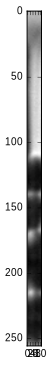

In [6]:
# connectivity to original image data remains,
# as long as it is not removed (due to memory/disk-space consumption reasons)

channel = channels[2]
pylab.imshow(channel.channel_image)

In [7]:
# lets look into the channel's cells ...

print(list(channel.cells))

[<molyso.mm.cell_detection.Cell object at 0x7f09d9e46f48>, <molyso.mm.cell_detection.Cell object at 0x7f09d9dd6248>, <molyso.mm.cell_detection.Cell object at 0x7f09d9e35d88>, <molyso.mm.cell_detection.Cell object at 0x7f09d9e151c8>]


In [8]:
# the last call did not really advance our insights ...
# let's take a look at some properties of the cell:
# *local_*top and *local_*bottom ...
# which coincide witht the pixel positions within the channel image
# Note: there is a top and bottom member as well,
# but these values include the total offset of the channel within the image!

for n, cell in enumerate(channel.cells):
    print("Cell #%d from %d to %d" % (n, cell.local_top, cell.local_bottom,))

Cell #0 from 109 to 140
Cell #1 from 142 to 169
Cell #2 from 171 to 215
Cell #3 from 217 to 255


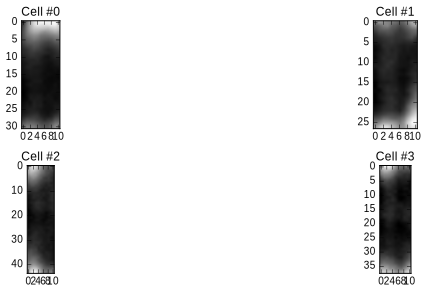

In [9]:
# again, connectivity to the image data remains ...
# lets show all individual cell images of that channel

# long line just to prettify the output ...
from functools import partial
next_subplot = partial(pylab.subplot, int(numpy.sqrt(len(channel.cells)))+1, int(numpy.sqrt(len(channel.cells))))

for n, cell in enumerate(channel.cells):
    next_subplot(n+1)
    pylab.title('Cell #%d' % (n,))
    pylab.imshow(cell.cell_image)
    
pylab.tight_layout()

This was only a brief overview of some basic functionality.
It might get expanded in the future. For now, if you'd like to get deeper insights on the working of *molyso*, I'd like to ask you to study the source files.

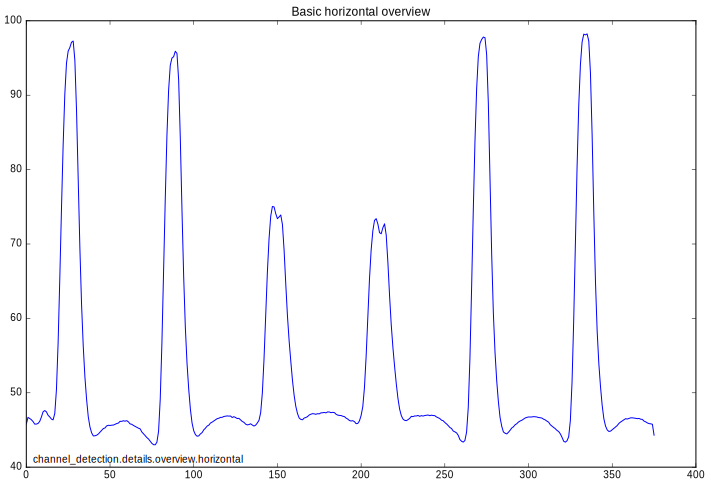

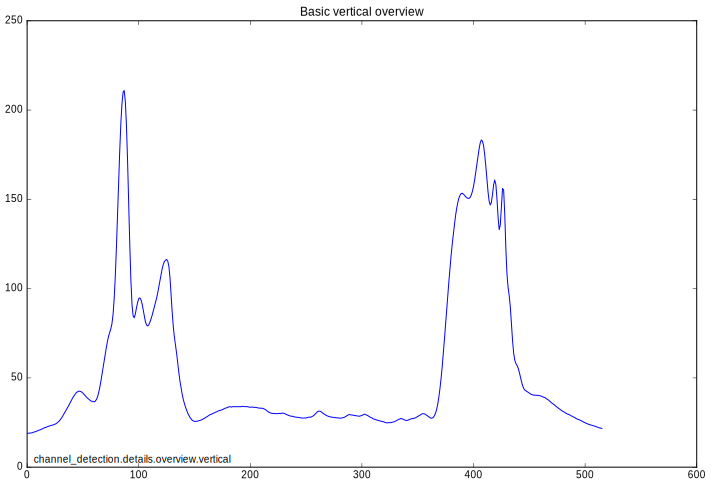

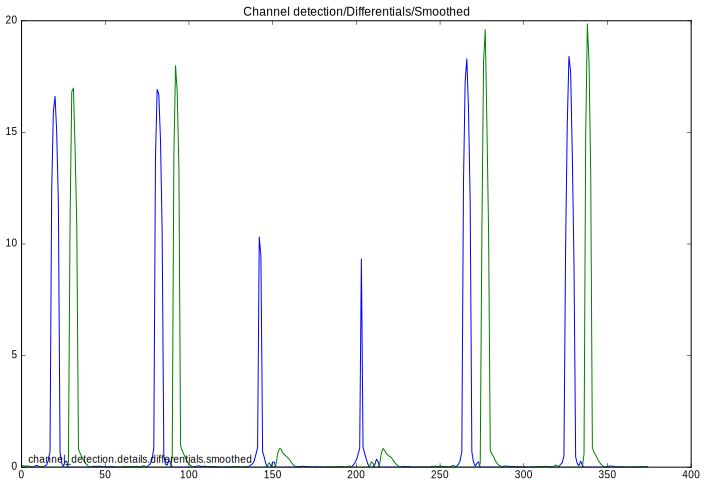

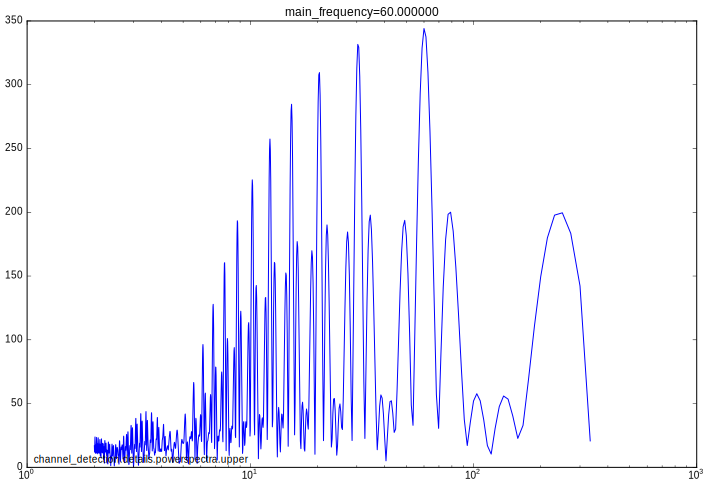

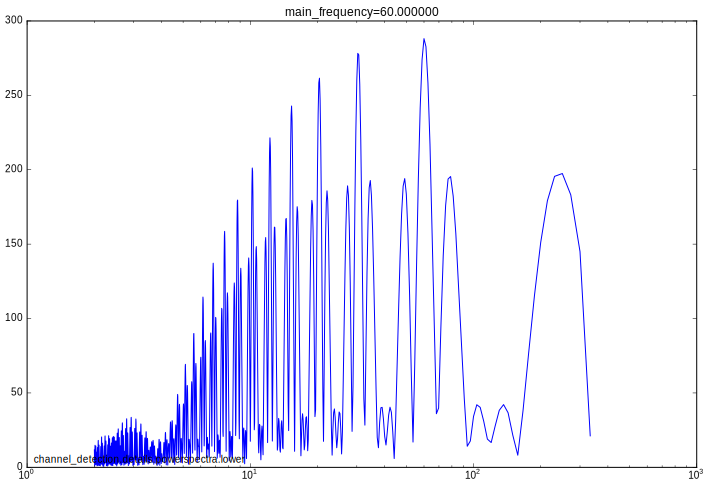

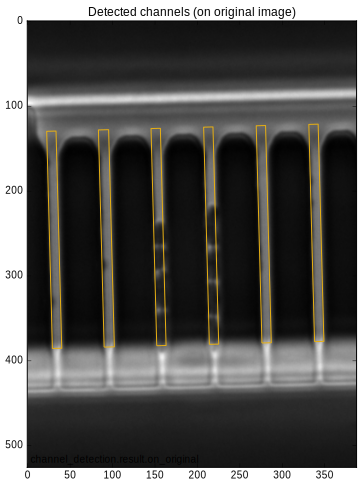

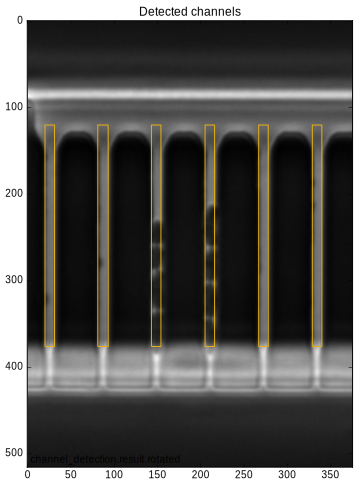

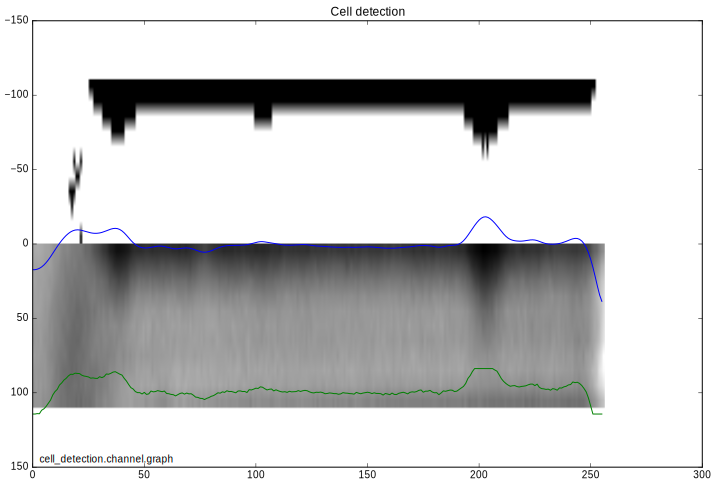

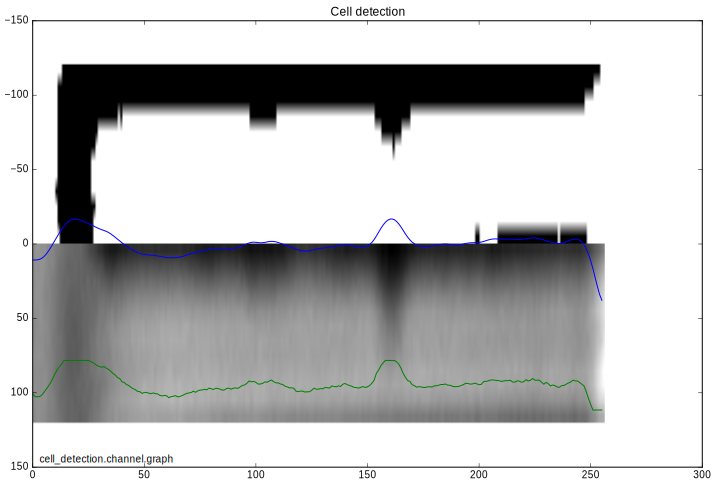

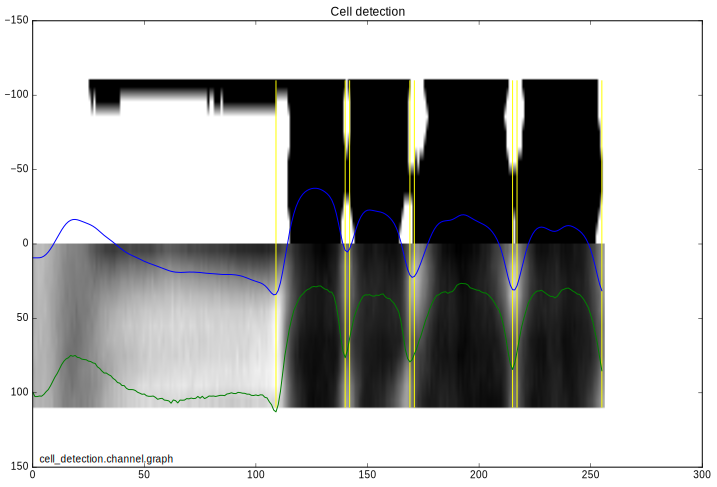

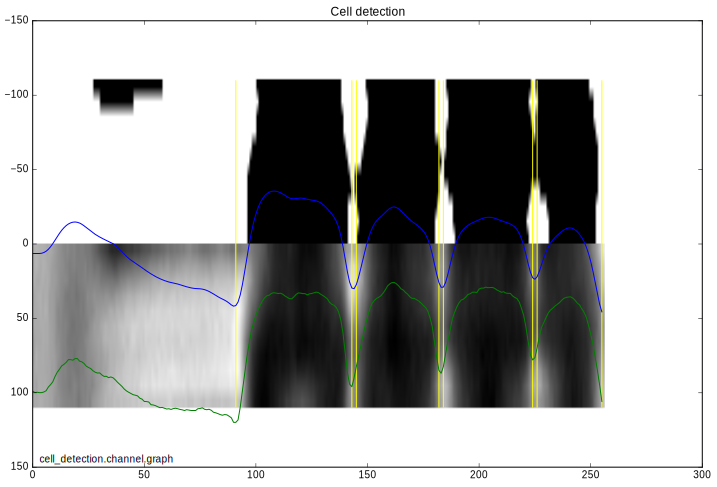

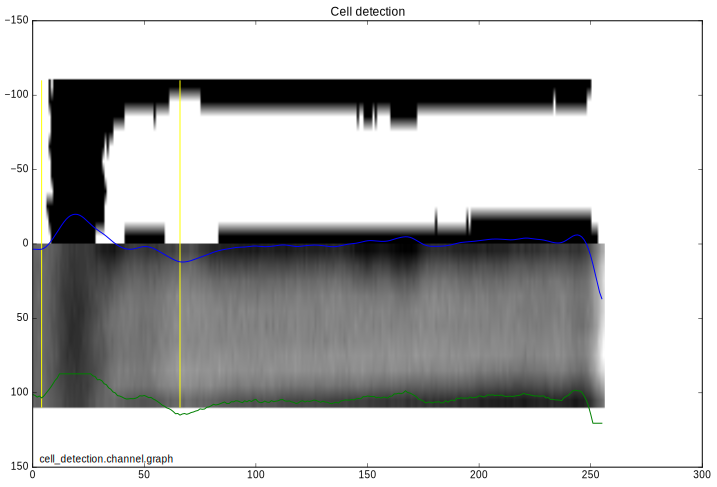

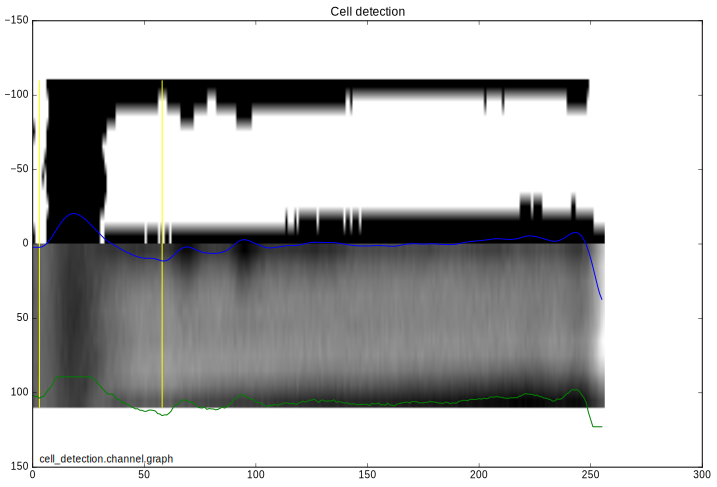

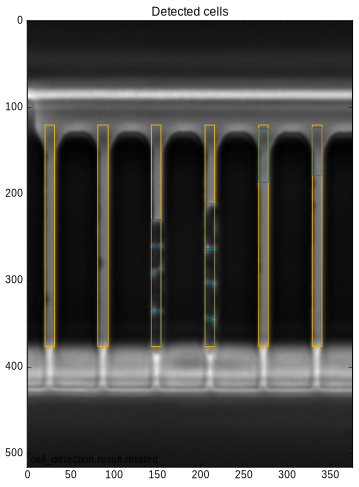

In [10]:
# PS: You can as well turn on Debug printing within IPython to get more insight on the internals
from molyso.debugging import DebugPlot
DebugPlot.force_active = True
DebugPlot.post_figure = 'show'

image.find_channels()
image.find_cells_in_channels()